<h1>DSCI100-004 Group 38 Final Report</h1>

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


<h2>Introduction</h2>

A research group in the department of Computer Science at UBC is collecting data about how people engage in playing video games. The project examines data collected from a dedicated minecraft server used to study player behaviour. As players explore the world, their actions and demographic information are recorded, which produces a dataset that summarizes their gameplay patterns. The researchers can use this data to draw insights relevant to advancing research into artificial intelligence. The central question guiding this report is: Can a player’s age and gaming experience predict the total number of gameplay hours they contribute to the Minecraft research server? To address this question, we analysed the <code>players.csv</code> dataset which contains player-specific information and cumulative play data, with 196 rows and 7 columns. 

<h3>players.csv</h3>
<h4>Variables</h4>
<ol>
    <li><code>experience (chr):</code> A categorical variable used to report the player's experience level ("Beginner", "Amateur", "Regular", "Veteran", "Pro").</li>
    <li><code>subscribe (lgl):</code> A boolean categorical variable used to represent whether the players are subscribed or not subscribed.</li>
    <li><code>hashedEmail (chr):</code> A categorical variable used to recognize each player. Each player has a unique code to identify them by.</li>
    <li><code>played_hours (dbl):</code> A numerical variable used to report the player's total hours played.</li>
    <li><code>name (chr):</code> A categorical variable used to identify the player's name.</li>
    <li><code>gender (chr):</code> A categorical variable used to identify the player's gender.</li>
    <li><code>Age (dbl):</code> A numerical variable used to report the player's age.</li>
</ol>

For the purposes of our data analysis, we are only concerned with the <code>age</code>, <code>experience</code> and <code>played_hours</code> of each participant. 

<h2>Methods & Results</h2>

In [3]:
# Loading data set & seed
set.seed(38)
url <- "https://docs.google.com/spreadsheets/d/e/2PACX-1vSSCemak0WawdLW14cASkemh8MmSgoFKf2FOZy-ypDcxcbvtyqG8vZih_rWViQnfkGN8Fuh4iqj4ag8/pub?gid=988986282&single=true&output=csv"
players <- read_csv(url)
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [5]:
# Wrangling and cleaning of data
players_clean <- players |>
    select(experience, Age, played_hours) |>
    drop_na()
players_clean

experience,Age,played_hours
<chr>,<dbl>,<dbl>
Pro,9,30.3
Veteran,17,3.8
Veteran,17,0.0
⋮,⋮,⋮
Veteran,22,0.3
Amateur,57,0.0
Amateur,17,2.3


In [6]:
# Summary of data set

# Summary table of quantitative variables
summary_table <- players_clean |>
  summarise(
      mean_Age = mean(Age),
      sd_Age = sd(Age),
      mean_hours = mean(played_hours),
      sd_hours = sd(played_hours),
      correlation_age_hours = cor(Age, played_hours))
summary_table

# Summary statistics grouped by experience level
summary_stats <- players_clean |>
    group_by(experience) |>
    summarise(
        amount_of_players = n(),
        mean_Age = mean(Age, na.rm = TRUE),
        sd_Age = sd(Age, na.rm = TRUE),
        min_Age = min(Age, na.rm = TRUE),
        max_Age = max(Age, na.rm = TRUE),
        
        mean_played_hours = mean(played_hours, na.rm = TRUE),
        sd_played_hours = sd(played_hours, na.rm = TRUE),
        min_played_hours = min(played_hours, na.rm = TRUE),
        max_played_hours = max(played_hours, na.rm = TRUE))
summary_stats

mean_Age,sd_Age,mean_hours,sd_hours,correlation_age_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.13918,7.389687,5.904639,28.49793,-0.06302587


experience,amount_of_players,mean_Age,sd_Age,min_Age,max_Age,mean_played_hours,sd_played_hours,min_played_hours,max_played_hours
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Amateur,63,21.36508,7.586707,11,57,6.0174603,21.987214,0,150.0
Beginner,35,21.65714,6.082486,17,42,1.2485714,4.105547,0,23.7
Pro,13,16.92308,3.839738,9,25,2.7846154,8.283905,0,30.3
Regular,35,22.02857,9.992602,10,58,18.7257143,58.719074,0,223.1
Veteran,48,20.95833,6.304198,16,46,0.6479167,1.937424,0,12.5


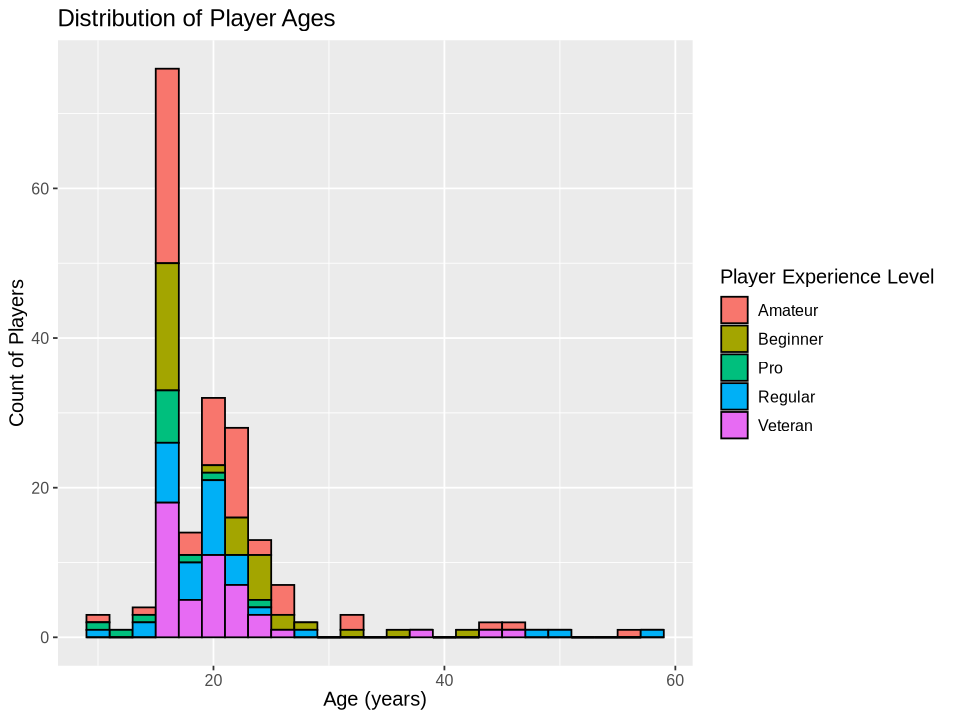

In [7]:
# Distribution of player's ages 
options(repr.plot.width = 8, repr.plot.height = 6)
age_distribution <- players_clean |>
  ggplot(aes(x = Age, fill = experience)) +
  geom_histogram(binwidth = 2, color = "black") +
  labs(
      title = "Distribution of Player Ages", 
      x = "Age (years)", 
      y = "Count of Players", 
      fill = "Player Experience Level") +
  theme(text = element_text(size = 12))
age_distribution

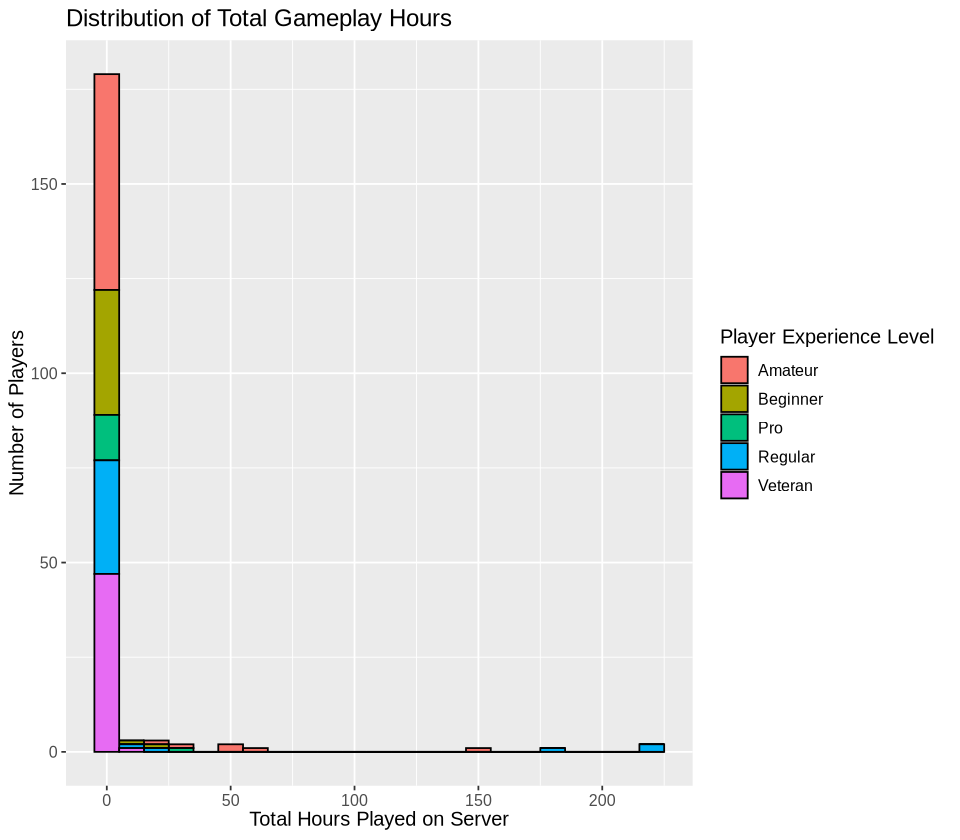

In [9]:
# Distribution of played hours per each player
options(repr.plot.width = 8, repr.plot.height = 7)
hours_distribution <- players_clean |>
  ggplot(aes(x = played_hours, fill = experience)) +
  geom_histogram(binwidth = 10, color = "black") +
  labs(
      title = "Distribution of Total Gameplay Hours", 
      x = "Total Hours Played on Server", 
      y = "Number of Players", 
      fill = "Player Experience Level") +
  theme(text = element_text(size = 12))
hours_distribution

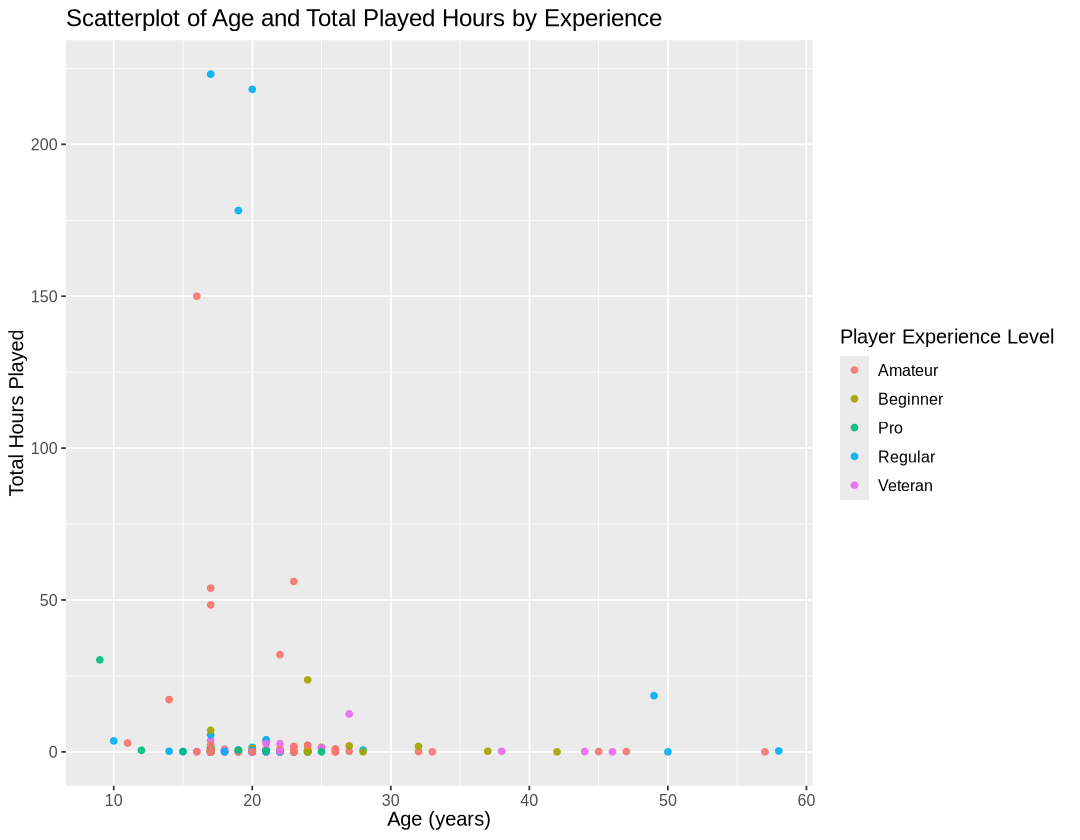

In [10]:
# Relationship between played hours and age
options(repr.plot.width = 9, repr.plot.height = 7)
players_plot <- players_clean |>
    ggplot(aes(x = Age, y = played_hours, color = experience)) +
    geom_point(alpha = 0.9) +
    labs(title = "Scatterplot of Age and Total Played Hours by Experience", 
         x = "Age (years)", 
         y = "Total Hours Played", 
         color = "Player Experience Level") +
    theme(text = element_text(size = 12))
players_plot

In [11]:
# Splitting the model for linear regression
set.seed(38)
players_split <- initial_split(players_clean, prop = 0.75, strata = played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)

In [12]:
# Linear Regression Model Specification, Recipe, & Workflow
set.seed(38)
lm_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

players_recipe <- recipe(played_hours ~ Age + experience, data = players_training)

players_fit <- workflow() |>
       add_recipe(players_recipe) |>
       add_model(lm_spec) |>
       fit(data = players_training)

In [13]:
# RMSE & RMSPE Values
set.seed(38)
lm_rmse <- players_fit |>
         predict(players_training) |>
         bind_cols(players_training) |>
         metrics(truth = played_hours, estimate = .pred) |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()
lm_rmse

lm_rmspe <- players_fit |>
         predict(players_testing) |>
         bind_cols(players_testing) |>
         metrics(truth = played_hours, estimate = .pred) |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()
lm_rmspe

[1] 30.86097

[1] 16.26574

`geom_smooth()` using formula = 'y ~ x'


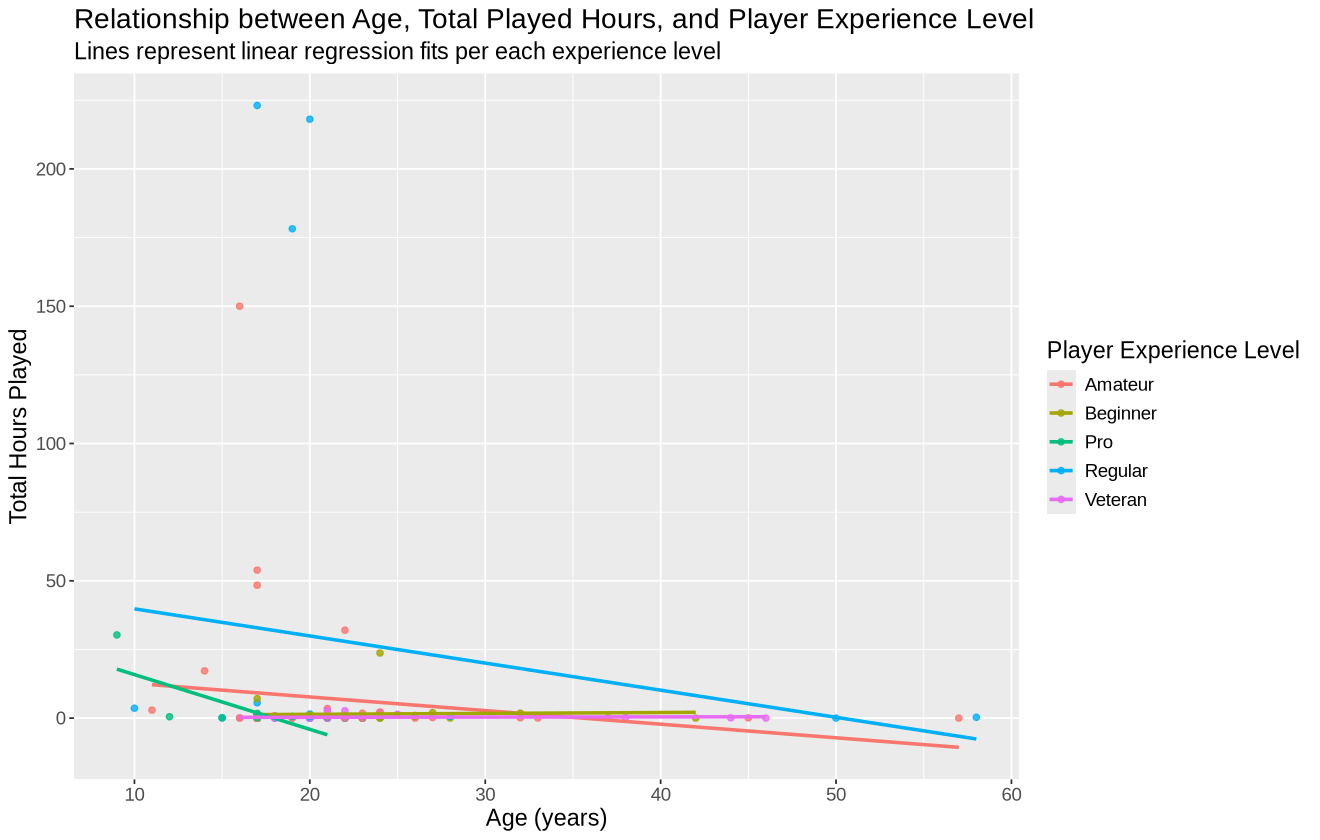

In [14]:
# Model Predictions & Plot
set.seed(38)
players_preds <- players_fit |>
   predict(players_training) |>
   bind_cols(players_training)

options(repr.plot.width = 11, repr.plot.height = 7)
lm_predictions <- players_preds |>
     ggplot(aes(x = Age, y = played_hours, color = experience)) +
            geom_point(alpha = 0.8) +
            geom_smooth(method = "lm", se = FALSE) +
            labs(
                title = "Relationship between Age, Total Played Hours, and Player Experience Level",
                subtitle = "Lines represent linear regression fits per each experience level",
                x = "Age (years)", 
                y = "Total Hours Played", 
                color = "Player Experience Level") +
            theme(text = element_text(size = 14))
lm_predictions

<h2>Discussion</h2>